# Deep Learning for Computer Vision

---

**Goethe University Frankfurt am Main**

Winter Semester 2022/23

<br>

## *Assignment 1 (Filtering)*

---

**Points:** 60<br>
**Due:** 2.11.2022, 10 am<br>
**Contact:** Matthias Fulde ([fulde@cs.uni-frankfurt.de](mailto:fulde@cs.uni-frankfurt.de))<br>

---

**Your Name:** Bastian Rothenburger

<br>

<br>

## Table of Contents

---

- [1 Convolution and Cross Correlation](#1-Convolution-and-Cross-Correlation-(30-Points))
  - [1.1 Algebraic Properties](#1.1-Algebraic-Properties-(10-Points))
  - [1.2 Dimension Formula](#1.2-Dimension-Formula-(5-Points))
  - [1.3 Implementation](#1.3-Implementation-(15-Points))
- [2 Separable Filters](#2-Separable-Filters-(10-Points))
  - [2.1 Correctness](#2.1-Correctness-(5-Points))
  - [2.2 Complexity](#2.2-Complexity-(5-Points))
- [3 Edge Detection](#3-Edge-Detection-(10-Points))
 - [3.1 Gradient Magnitude](#3.1-Gradient-Magnitude-(5-Points))
 - [3.2 Gradient Direction](#3.2-Gradient-Direction-(5-Points))
- [4 Image Denoising](#4-Image-Denoising-(10-Points))
  - [4.1 Gaussian Approximation](#4.1-Gaussian-Approximation-(5-Points))
  - [4.2 Comparsion](#4.2-Comparsion-(5-Points))


<br>

## Setup

---

In this notebook we use the libraries **Matplotlib**, **NumPy** and **OpenCV**. We recommend to use at least the 3.x versions of OpenCV. You can check your version with the statements below.

In [2]:
import numpy as np
import cv2 as cv

# Check installed OpenCV version.
cv.__version__

'4.6.0'

We want Matplotlib figures to appear within the notebook rather than inside a separate window, which is default in some environments, therefore we make use of the `%matplotlib` magic function to set the Matplotlib backend to inline.

In [3]:
import matplotlib.pyplot as plt

# Set default color map and interpolation method for images.
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'

%matplotlib inline

We import a utility function to show images. See `utils.py` for documentation.

In [4]:
from utils import display

<br>

### Definitions

---

We define an `error` function to measure the relative difference between two outcomes.

In [5]:
def error(x, y):
    """
    Calculate the sum of the relative differences.
    The absolute differences are scaled with the sum of the absolute values.

    Parameters:
        - x, y: Arrays with equal shape.

    Returns:
        - Error between x and y.

    """
    x = x.astype(np.float32)
    y = y.astype(np.float32)

    return np.sum(abs(x - y) / (abs(x) + abs(y)))

<br>

## Exercises

---

### 1 Convolution and Cross Correlation (30 Points)

---

In the lecture, *convolution* and *cross correlation* were introduced as operations that allow to apply a filter to an image.

In order to get familiar with them, we're going to show some mathematical properties of the operations and find a formula that describes how these operations transform the dimensions of the input image with respect to their hyperparameters. Finally, we'll implement the operation on our own.

However, before we start, let's briefly recap the definitions.

---

For simplicity, we define the input $I$ and filter $K$ as discrete functions with finite support, rather than as matrices.

Then the **cross correlation** operation can be defined as

$$
    (I \star K)[m, n]
    =
    \sum_{k = -\infty}^\infty
    \sum_{l = -\infty}^\infty
    I[k, l] \,
    K[m + k, n + l].
$$

The **convolution** operation in the discrete case for real values is exactly the same, except that the filter is flipped along both axes, that is, the order of the entries is reversed. We can define it as

$$
    (I * K)[m, n]
    =
    \sum_{k = -\infty}^\infty
    \sum_{l = -\infty}^\infty
    I[k, l] \,
    K[m - k, n - l].
$$

Note that the definition of $I$ and $K$ as functions with finite support implies that the infinite sums are absolutely convergent.

Regarding the convolution of images with multiple channels, we assume that the number of channels of the input and the filter matches. Then each input channel is convolved with the respective channel of the filter and the per channel outputs are added up to give the final output.

<br>

### 1.1 Algebraic Properties (10 Points)

---

The convolution operation is commutative, associative, and distributive over addition. Furthermore, it is associative with scalar multiplication. The identity element of the operation is the Dirac delta. In this section we want to show, that these claims are actually true.

<br>

#### 1.1.1 Commutativity (2 Points)

Given the definition above, show that the convolution operation with input $I$ and filter $K$ is commutative, that is

$$
    I * K = K * I.
$$


##### Proof

*Write your proof here.*


$$
    (I * K)[m, n]
    =
    \sum_{k = -\infty}^\infty
    \sum_{l = -\infty}^\infty
    I[k, l] \,
    K[m - k, n - l].
$$

First we define $x= m-k$ and $y=n-l$

$$\\\rightarrow k=m-x \space and\space l=n-y$$

since m and n are finite we know that: 

$$
k=\infty \rightarrow x=-\infty\\
k=-\infty \rightarrow x=\infty\\
l=\infty \rightarrow y=-\infty\\
l=-\infty \rightarrow y=\infty
$$

After that we substitute x and y into the defintion of convolution:

$$
    (I * K)[m, n]
    =
    \sum_{x = -\infty}^\infty
    \sum_{y = -\infty}^\infty
    I[m-x, n-y] \,
    K[x,y]\\
    =\sum_{x = -\infty}^\infty
    \sum_{y = -\infty}^\infty
    K[x,y]I[m-x, n-y] \,
$$

and by defintion

$$
    \sum_{x = -\infty}^\infty
    \sum_{y = -\infty}^\infty
    K[x,y]I[m-x, n-y]=(K * I)[m, n]
$$
<div style="text-align:right">$\square$</div>


<br>

#### 1.1.2 Associativity (2 Points)

Again let $I$ be the input and let $K_1$ and $K_2$ be two filters. Show that the convolution operation with input $I$ and filters $K_1$ and $K_2$ is associative, that is

$$
    I * (K_1 * K_2) = (I * K_1) * K_2.
$$


##### Proof

*Write your proof here.*
First we plug in the defintion two times and we use the commutativ property of convolution in the first step
$$
   I * (K_1 * K_2)[m, n]
    =
    I*
    \sum_{k_2 = -\infty}^\infty
    \sum_{l_2 = -\infty}^\infty
    K_2[k_2, l_2] \,
    K_1[m - k_2, n - l_2]=\\
      \sum_{k_1 = -\infty}^\infty
    \sum_{l_1 = -\infty}^\infty
     \sum_{k_2 = -\infty}^\infty
    \sum_{l_2 = -\infty}^\infty
    I[k_1,l_1]
    K_2[k_2, l_2]
    K_1[(m - k_2) -k_1,(n - l_2)-l_1]\\
       \sum_{k_2 = -\infty}^\infty
    \sum_{l_2 = -\infty}^\infty
    K_2[k_2, l_2]
     \sum_{k_1 = -\infty}^\infty
    \sum_{l_1 = -\infty}^\infty
    I[k_1,l_1]
    K_1[(m - k_2) -k_1,(n - l_2)-l_1]\\
$$
as substraction is kommutativ 
$$
\sum_{k_2 = -\infty}^\infty
    \sum_{l_2 = -\infty}^\infty
    K_2[k_2, l_2]
     \sum_{k_1 = -\infty}^\infty
    \sum_{l_1 = -\infty}^\infty
    I[k_1,l_1]
    K_1[(m - k_1) -k_2,(n - l_1)-l_2]\\
$$
now we can use the defintion backwards:
$$
\sum_{k_2 = -\infty}^\infty
    \sum_{l_2 = -\infty}^\infty
    K_2[k_2, l_2]
    (I * K_1)[m-k_2, n-l_2]=(I * K_1)*K_2[n,m] \\
$$
<div style="text-align:right">$\square$</div>

<br>

#### 1.1.3 Distributivity (2 Points)

Given an input $I$ and filters $K_1$ and $K_2$, show that convolving the input with a sum of filters is the same as adding the results of convolving the input with the individual filters, i.e. show that convolution is distributive over addition, that is

$$
    I * (K_1 + K_2) = (I * K_1) + (I * K_2).
$$


##### Proof

*Write your proof here.*
$$
    I * (K_1 + K_2) = (I * K_1) + (I * K_2).
$$

As usual we make use of the definition

$$
     I * (K_1 + K_2)[m, n]\\
    =
    \sum_{k = -\infty}^\infty
    \sum_{l = -\infty}^\infty
    I[k, l] \,
    K_1[m - k, n - l]+K_2[m - k, n - l])
$$
At this point we can use the distributive properties for scalar values

$$
    =
    \sum_{k = -\infty}^\infty
    \sum_{l = -\infty}^\infty
    I[k, l] \,
    (K_1[m - k, n - l]+\sum_{k = -\infty}^\infty
    \sum_{l = -\infty}^\infty
    I[k, l] \,
    K_2[m - k, n - l])
$$

And again by applying the defintion backwards we obtain:
$$
=(I * K_1)[m, n] + (I * K_2)[m, n]
$$
<div style="text-align:right">$\square$</div>

<br>

#### 1.1.4 Scalar Multiplication (1 Point)

Let $\alpha \in \mathbb{R}$. Show that the convolution operation with input $I$ and filter $K$ is associative with respect to scalar multiplication, that is

$$
    (\alpha I) * K = \alpha(I * K).
$$


##### Proof

*Write your proof here.*


Starting from the right side:
$$
\alpha(I * K)[m,n]=\alpha\sum_{k = -\infty}^\infty
    \sum_{l = -\infty}^\infty
    I[k, l] \,
    K[m - k, n - l]
$$
Now we can use distributive and associatative properties of scalar multiplication to obtain:
$$
\sum_{k = -\infty}^\infty
    \sum_{l = -\infty}^\infty
    (\alpha I[k, l]) \,
    K[m - k, n - l]
$$

And again we apply the defintion backwards:
$$
((\alpha I) * K)[m,n]
$$
<div style="text-align:right">$\square$</div>

<br>

#### 1.1.5 Identity (1 Point)

The identity element of the convolution operation that preserves the input is the Dirac delta, which in the discrete case can be defined as

$$
    \delta[m,n]
    =
    \begin{cases}
        1 & \text{if} \enspace m = n = 0 \\
        0 & \text{otherwise}.
    \end{cases}
$$

Show that $\delta$ does not change the input $I$, that is

$$
    I * \delta = I.
$$


##### Proof

*Write your proof here.*
$$
    (I * \delta)[m, n]
    =
    \sum_{k = -\infty}^\infty
    \sum_{l = -\infty}^\infty
    I[k, l] \,
    \delta[m - k, n - l]
$$

Because of the defintion of sigma the only summand in the sum above that is different from zero is the one where $k=m \, and\, l=n$:

$$
    \delta[m,n]
    =
    \begin{cases}
        1 & \text{if} \enspace m = n = 0 \\
        0 & \text{otherwise}.
    \end{cases}
$$

Therfore the only thing that remains from the first equation  is:
$$
    (I * \delta)[m, n]
    =
    I[m, n] \,
    \delta[0, 0]
    =
    I[m, n] \,
    1
    =
    I[m, n]
$$
<div style="text-align:right">$\square$</div>

<br>

#### 1.1.6 Linearity (2 Points)

Does the discrete convolution operation constitute a linear map, satisfying the additivity and homogeneity conditions?<br>Prove your answer.

##### Answer

*Write your answer here.*

no it does not because of the homogeneity of degree 2

##### Proof

*Write your proof here.*
Homogeneity of degree 2. Looked up defintion on: https://en.wikipedia.org/wiki/Homogeneous_function
$$
    (\alpha I) * (\alpha K) = \alpha^2(I * K)
$$
$$
(\alpha I) * (\alpha K) = 
\sum_{k = -\infty}^\infty
    \sum_{l = -\infty}^\infty
    (\alpha I[k, l]) \,
    ( \alpha K[m - k, n - l])
    \\=
    \alpha^2\sum_{k = -\infty}^\infty
    \sum_{l = -\infty}^\infty
     I[k, l] \,
    \alpha K[m - k, n - l]=
     \alpha^2(I * K)
$$
<div style="text-align:right">$\square$</div>

<br>

### 1.2 Dimension Formula (5 Points)

---

In practice we can't compute an infinite sum, so we have to handle the *boundaries* of the given inputs.

To preserve the dimensions of the input, we apply **padding** to the image, that means we add pixels to the start and end of each dimension. The size of the padding as well as the values used for the additional pixels are hyperparameters to the convolution and cross correlation operations.

The same holds for the **stride**, which determines how far we move the filter in each step.

<br>

![convolution](images/convolution.png)

<br>

Take the above figure as an example for strided convolution with padding. ([Dumoulin and Visin](#ref-1))

Here, a $3 \times 3$ filter is applied to a $5 \times 5$ input image, with 1 pixel padding and a stride of 2, resulting in an output image of size $3 \times 3$. The first valid filter position is over the top left pixel of the input, due to the applied padding. The filter is then slided across the columns and rows of the input, skipping one pixel in each step, due to the two pixel stride.

---

Consider an input image $I_\text{in} \in \mathbb{R}^{N \times N}$ and a filter $K \in \mathbb{R}^{M \times M}$ with $M, N \in \mathbb{N}$ and $M$ being odd. In practice, neither the input nor the filter have to be square, but the transformation is the same in each dimension, so for this exercise, we can assume they are.

We convolve $I_\text{in}$ with $K$ to get the output $I_\text{out}$, that is

$$
    I_\text{out} = I_\text{in} * K.
$$

For this operation, we assume uniform padding with $P$ pixels. That means the same amount of padding is applied to each of the borders of the image. In addition, we use a stride of $S$ pixels in both directions.

<br>

#### 1.2.1 Task

Derive a formula to compute the size $D$ of the output image $I_\text{out}$ given the size $N$ of the input image $I_\text{in}$, the size $M$ of the filter $K$, the number of pixels used for padding $P$, and the stride $S$. For each part of the formula, give a brief explanation.

<br>

#### 1.2.2 Solution

*Write your solution here.*

Trying to get D without padding and stride is straight forward:

$$
D=N-M+1
$$

If you consider the one dimensional case the middle of the filter has to start at the postion $ \lfloor (M/2) \rfloor$. Said differently we loose $ \lfloor (M/2) \rfloor$ pixels on the left and on the right.
Because M is defiened to be odd in the paragraph above we have to apply +1 since flooring left and right let us loose 1. (if M was not odd +1 is not added)

$$
D=N+2P-M+1
$$

By throwing padding into the mix one essentially adds pixels on the left and on the right(if one thinks about one dimensinal case). Therefore we have to add 2 times P.

$$
D=\frac{N-M+2P}{S}+1
$$

Finally we are able to factor in Stride. The denominator tells us how many steps with size one we are able to take. If you divides that by S, which is our manually set step size, you get the number of steps with size P you are able to take. (Note the result of the fraction has to be an integer as far as my understanding goes. Otherwise you would just ignore parts of the image? )

<br>

### 1.3 Implementation (15 Points)

---

In this exercise, our goal is to implement the convolution and cross correlation operations by ourselves.

<br>

#### 1.3.1 Task

Complete the definition of the `filter2D` function below.

The function should perform *convolution* or *cross correlation* on the input image and the given filter. The function should work for inputs with one or more channels and produce a single channel output with the same data type as the input image.

Depending on the given arguments, the function should [pad](https://numpy.org/doc/stable/reference/generated/numpy.pad.html) the spatial dimensions of the input with zeros before the filter is applied, and it should also work for strides larger than one. It should [flip](https://numpy.org/doc/stable/reference/generated/numpy.flip.html) the kernel horizontally and vertically to perform convolution if requested.

Only functions and overloaded operators from NumPy or plain Python are allowed.

In order to encourage you to write performant vectorized code, full points are only awarded if no more than two loops are used.

<br>

#### 1.3.2 Solution

Enter your solution in the code cell below. Store the output in the given variable.

In [93]:
def filter2D(image, kernel, padding=0, stride=1, flip=False):
    """
    Convolve or correlate a grayscale or color image with a filter kernel.

    Notes:
        - The number of channels in image and kernel must match.
        - The format must be spatial dimensions before channels.
        - The output has the same data type as the input.

    Parameters:
        - image: Grayscale or color image.
        - kernel: Filter kernel.
        - padding: Uniform zero padding for the input image.
        - stride: Uniform stepsize for the kernel.
        - flip: Flip the kernel for convolution.

    Returns:
        - out: The filtered image.

    """
    ############################################################
    ##                   START OF YOUR CODE                   ##
    ############################################################
    
    # obtain shapes in order to determine output size
    xKern, yKern= kernel.shape[0],kernel.shape[1]    
    xImg, yImg = image.shape[0],image.shape[1]
    
    # Using the formular derived in the exercise before in order to get the shape of the output
    # use int() in order to be safe if your stride makes no sense 
    x = int(((xImg - xKern + 2 * padding) / stride) + 1)
    y = int(((yImg - yKern + 2 * padding) / stride) + 1)
    #create output array with correct shape
    out = np.zeros((x, y))
            
    #flip the kernel horizontally and vertically     
    if flip==True:
        kernel = np.flip(np.flip(kernel,axis=0),axis=1)

            
    # Check whether padding is applied
    if padding != 0:
        #check if we obtained multichannel input images
        if len(image.shape)==3:
                #first create an array that has the desired output shape and contains only zeros
                imagep = np.zeros((image.shape[0]+ padding*2 , image.shape[1] + padding*2,image.shape[2]))
                #fill in the original in the center
                imagep[int(padding):int(-1 * padding), int(padding):int(-1 * padding),0:image.shape[0]] = image
        
        #just for greyscale images        
        else:
            imagep = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
            imagep[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
                
    else:
        imagep = image
    
    
    
    # Loop one :) for the y axis
    for y in range(imagep.shape[1] - yKern+1):
    #the range condition in addition to the stride condition makes sure that the right number of steps is taken                 
        if y % stride == 0:
            #loop 2 for the x axis 
            for x in range(imagep.shape[0] - xKern+1):
                #the range condition in addition to the stride condition makes sure that the right number of steps is taken
                                                                
                if x % stride == 0:
                    #check whether we got multichannel or greyscale images and ajust accordingly
                    if len(imagep.shape)==3:
                        #dividing by stride yields correct position in the output image
                        out[int(x/stride), int(y/stride)] = (kernel * imagep[x: x + xKern, y: y + yKern,0:kernel.shape[0]]).sum()
                    else:
                        
                        out[int(x/stride), int(y/stride)] = (kernel * imagep[x: x + xKern, y: y + yKern]).sum()
                        
                

    

    ############################################################
    ##                    END OF YOUR CODE                    ##
    ############################################################
    return out

<br>

#### 1.3.3 Test

For testing your implementation, two test cases are given below.

In [6]:
def create_test_inputs(x_range, x_shape, k_range, k_shape):
    """
    Generates a test image and a filter.
    The pixel values are sampled evenly distributed over the specified ranges.

    Parameters:
        - x_range: Range for image values.
        - x_shape: Shape of the image.
        - k_range: Range for filter values.
        - k_shape: Shape of the filter.

    Returns:
        - x: Test image.
        - k: Test filter.

    """
    x = np.linspace(*x_range, num=np.prod(x_shape)).reshape(x_shape)
    k = np.linspace(*k_range, num=np.prod(k_shape)).reshape(k_shape)

    return x, k

In [94]:
# Test function with a grayscale image and unit stride.
image, kernel = create_test_inputs(
    (-.1, .5), (5, 5),
    (-.2, .3), (3, 3)
)

result = filter2D(image, kernel, padding=1, stride=1)

difference = error(result, np.array([
    [.0075,     .030625,  .0521875,  .07375,   .0475   ],
    [.114375,   .1725,    .18375,    .195,     .10875  ],
    [.1753125,  .22875,   .24,       .25125,   .1228125],
    [.23625,    .285,     .29625,    .3075,    .136875 ],
    [.0075,    -.05375,  -.0603125, -.066875, -.1025   ]
]))

print(f'Difference is {difference}')

Difference is 0.0


In [95]:
# Test function with a color image and non unit stride.
image, kernel = create_test_inputs(
    (-.3, .5), (4, 4, 3),
    (-.2, .4), (3, 3, 3)
)

result = filter2D(image, kernel, padding=1, stride=2)

difference = error(result, np.array([
    [-0.30343699, -0.05081833],
    [ 0.89572831,  1.44898527]
]))
print
print(f'Difference is {difference}')

Difference is 0.0


<br>

### 2 Separable Filters (10 Points)

---

A **separable filter** is a filter that can be written as the product of two or more simpler filters.

In particular, a two-dimensional separable filter can be decomposed in the product of two one-dimensional filters. The subsequent convolution with the lower dimensional filters can reduce the computational cost significantly.

For instance, consider a filter $K \in \mathbb{R}^{h \times w}$. The matrix shaped filter $K$ is separable if we can write it as the outer product of two vector shaped filters $\mathbf{k}^{(1)} \in \mathbb{R}^h$ and $\mathbf{k}^{(2)} \in \mathbb{R}^w$, as in

$$
    K
    \:=\:
    \alpha\beta
    \begin{bmatrix}
        k_1^{(1)} k_1^{(2)} & \cdots & k_1^{(1)} k_w^{(2)} \\
        \vdots  & \ddots & \vdots  \\
        k_h^{(1)} k_1^{(2)} & \cdots & k_h^{(1)} k_w^{(2)}
    \end{bmatrix}
    \:=\:
    \alpha
    \begin{bmatrix}
        k_1^{(1)} \\
        \vdots \\
        k_h^{(1)}
    \end{bmatrix}
    \:
    \beta
    \begin{bmatrix}
        k_1^{(2)} & \cdots & k_w^{(2)}
    \end{bmatrix}
    \:=\:
    \mathbf{k}^{(1)}
    \,
    \mathbf{k}^{(2)\top},
$$

where $\alpha, \beta \in \mathbb{R}$.

<br>

### 2.1 Correctness (5 Points)

---

Let $I \in \mathbb{R}^{H \times W}$. Show that the convolution of the input $I$ with the filter $K$ is the same as the sequential convolution of $I$ with the simpler filters $\mathbf{k}^{(1)}$ and $\mathbf{k}^{(2)}$, that is

$$
    I * K = (I * \mathbf{k}^{(1)}) * \mathbf{k}^{(2)}.
$$


##### Proof

*Write your proof here.*

We plug in the defintion and make use of the commutative property proven above

$$
    I * K = (K * I)[m, n]
    =
    \sum_{k = -\infty}^\infty
    \sum_{l = -\infty}^\infty
    K[k, l] \,
    I[m - k, n - l].
$$

Because K is separable we can write:
$$
    (K * I)[m, n]
    =
    \sum_{k = -\infty}^\infty
    \sum_{l = -\infty}^\infty
    k^{(1)}[k]k^{(2)}[l] \,
    I[m - k, n - l].
$$

repositioning yields:

$$
    (K * I)[m, n]
    =
    \sum_{l = -\infty}^\infty
    k^{(2)}[l]
    \sum_{k = -\infty}^\infty
    k^{(1)}[k] \,
    I[m - k, n - l]
$$

Since 1D covolution is defined as(source:https://en.wikipedia.org/wiki/Convolution):

$$
    (k * i)[m]
    =
    \sum_{k = -\infty}^\infty
    k[k] \,
    i[m - k]
$$

with the help of this defintion we can go back. (I don´t know wether this notation is correct):

$$
    \sum_{l = -\infty}^\infty
    k^{(2)}[l]
    \sum_{k = -\infty}^\infty
    k^{(1)}[k] \,
    I[m - k, n - l]
    =
    \sum_{l = -\infty}^\infty
    k^{(2)}[l]
    k^{(1)}[m]*I[m, n-l]
$$
$$
\sum_{l = -\infty}^\infty
    k^{(2)}[l]
    I[m, n-l]*k^{(1)}[m]=k^{(2)}[n]*
    I[m, n]*k^{(1)}[m]
$$

and with the help of commutative and associative properties 

$$
k^{(2)}[n]*
    I[m, n]*k^{(1)}[m]=(I[m, n]*k^{(1)}[m])*k^{(2)}[n]    
$$
<div style="text-align:right">$\square$</div>

<br>

### 2.2 Complexity (5 Points)

---

Given the example above of a separable two dimensional filter $K$, derive asymptotic upper bounds for the computational complexity of the convolution $I * K$ and the sequential application of the filters $\mathbf{k}^{(1)}$ and $\mathbf{k}^{(2)}$ to the input $I$. Explain your results.

<br>

##### Answer

*Write your answer here.*
<br>

Lets think about the number of multiplications if you apply the filter K:

$$
H_K \cdot W_K \cdot (H_I-H_K+1) \cdot (W_I-W_K+1)
$$

vs lets think about the number of multiplications if you apply the filters $\mathbf{k}^{(1)}$ and $\mathbf{k}^{(2)}$ sequentially:

$$
H_K \cdot 1 \cdot (H_I-H_K+1) \cdot (W_I)
+
H_K \cdot 1 \cdot (H_I) \cdot (W_I-W_K+1)
$$

The first one should have complexity $ \mathbf{O}(H_KW_KH_IW_I)$ whereas the second one has roughly the complexitiy of $ \mathbf{O}(2H_KH_IW_I)$


<br>

### 3 Edge Detection (10 Points)

---

In the lecture we have seen, that we can **detect edges** by approximating the image gradient in horizontal and vertical direction. We remember that for a one-dimensional differentiable function $f(x)$, the gradient corresponds to the derivative, which can be expressed as the limit of the difference quotient

<br>

$$
    \frac{\text{d}}{\text{d}x} f(x)
    =
    \lim_{h \to 0} \frac{f(x + h) - f(x)}{h}
    \mathrel{\hat{=}}
    \lim_{h \to 0} \frac{f(x + h) - f(x - h)}{2h}\, .
$$

<br>

However, in the discrete image domain, we can only take differences at one pixel intervals, so we cannot actually compute the gradient at a given image location. But we can adapt the above formula. That is, for a one-dimensional discrete function $f[x]$, we can compute

<br>

$$
    \frac{\text{d}}{\text{d}x} f[x]
    \approx
    \frac{f[x + 1] - f[x - 1]}{2}\, .
$$

<br>

Consequently, interpreting an image $I$ as a two variable discrete function mapping indices to pixel intensities, we can approximate the gradient as

<br>

$$
    \nabla I
    =
    \left[
        \frac{\partial I}{\partial x},
        \frac{\partial I}{\partial y}
    \right]
    \approx
    \left[
        \frac{I[x+1, y] - I[x-1, y]}{2},
        \frac{I[x, y+1] - I[x, y-1]}{2}
    \right].
$$

<br>

The image gradient encodes the information in which direction the pixel intensity increases the most, and by which rate.


<br>

### 3.1 Gradient Magnitude (5 Points)

---

The amount by which the image intensity is changing when moving into the direction of the fastest increase is given by the **magnitude** of the gradient, which is the $L_2$ norm of the vector, i.e.

$$
    \lVert \nabla I \rVert
    =
    \sqrt{\left(\frac{\partial I}{\partial x}\right)^2 + \left(\frac{\partial I}{\partial y}\right)^2\:}.
$$

<br>

#### 3.1.1 Task

We want to use the magnitude of the image gradient to construct a simple edge detector.

In order to do this, define two $3 \times 3$ *correlation* kernels `Kx` and `Ky`, to approximate the image gradient in $x$ and $y$ direction, based on the central difference formula given above. When doing this, you can ignore the normalization by the factor $\frac{1}{2}$. The resulting filter kernels should look familiar, as they correspond to an operator introduced in the lecture. Which one?

Proceed as follows:

1. Convert the color image loaded below to grayscale, and cast the data type to `float32`.
2. Use the [filter2D](https://docs.opencv.org/4.6.0/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04) function from OpenCV to apply the filters you defined to the image, such that the outputs have the same data type as the input.
3. Compute the magnitude of the gradient manually, using only arithmetic functions and operators from NumPy.

For this exercise, no loops are allowed.

<br>

#### 3.1.2 Solution

Write your solution in the marked code cell below. Store filter kernels and result in the given variables.

In [162]:
# Read color image without alpha channel.
color = cv.imread('lenna.jpg')

# Swap red and blue channel.
color = cv.cvtColor(color, cv.COLOR_BGR2RGB)

In [163]:
############################################################
##                   START OF YOUR CODE                   ##
############################################################
#convert to greyscale
colorx = cv.cvtColor(color, cv.COLOR_RGB2GRAY)

image = np.float32(colorx)


#filter from the lecture which is equivalent to delta I
Kx = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
Ky = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
#apply correlation with filters
imagex = cv.filter2D(image, -1, Kx)
imagey = cv.filter2D(image, -1, Ky)
#write gradient magnitude formular into code
mag = (imagex**2+imagey**2)**(0.5)

############################################################
##                    END OF YOUR CODE                    ##
############################################################

<br>

#### 3.1.3 Result

Display your result with the following statement.

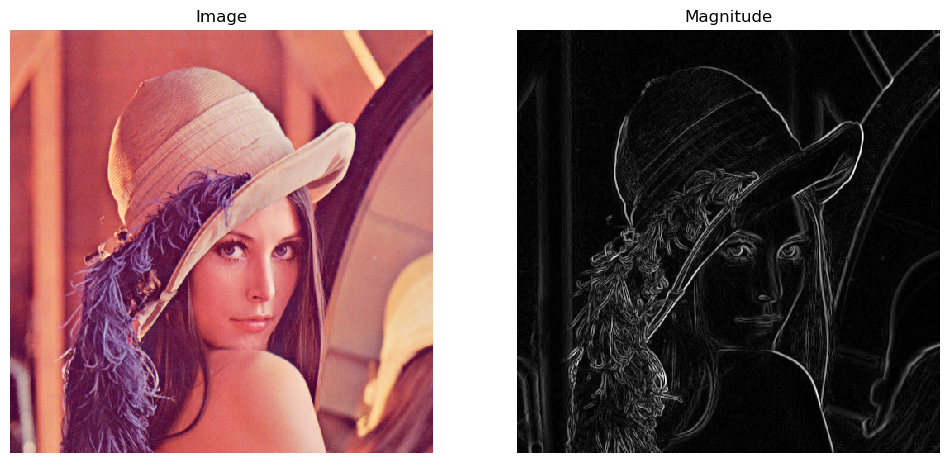

In [164]:
# Show original image and extracted edges.
display((12, 6), [
    (color, 'Image',     121),
    (mag,   'Magnitude', 122)
])

<br>

### 3.2 Gradient Direction (5 Points)

---

The direction of the gradient, which is the direction where the image intensity changes the most, can be computed as

$$
    \theta
    =
    \tan^{-1}
    \left(
        \frac{\nabla_y I}{\nabla_x I}
    \right).
$$

<br>

#### 3.2.1 Task

In this exercise, we want to use the direction of the gradient to extract only a subset of edges with a particular orientation from the image, namely those edges roughly parallel to the counterdiagonal ╱ of the image.

To approximate the image gradient, we'll use the separable **Sobel** operator. Decompose the $3 \times 3$ correlation kernels of the Sobel operator into two vector shaped kernels $\mathbf{k}_1$ and $\mathbf{k}_2$ that can be sequentially applied to the input image.

Proceed as follows:

1. Convert the color image loaded below to grayscale, and cast the data type to `float32`.
2. Use the [sepFilter2D](https://docs.opencv.org/4.6.0/d4/d86/group__imgproc__filter.html#ga910e29ff7d7b105057d1625a4bf6318d) function from OpenCV to apply the filters you defined to the image, such that the outputs have the same data type as the input.
3. This time you can use the function [cartToPolar](https://docs.opencv.org/4.6.0/d2/de8/group__core__array.html#gac5f92f48ec32cacf5275969c33ee837d) to compute both magnitude and angle of the image gradient.
4. The [inRange](https://docs.opencv.org/4.6.0/d2/de8/group__core__array.html#ga48af0ab51e36436c5d04340e036ce981) function can be used to create a mask for a suitable angular range.
5. Apply the mask with the [bitwise_and](https://docs.opencv.org/4.6.0/d2/de8/group__core__array.html#ga60b4d04b251ba5eb1392c34425497e14) function to the magnitude.

The result doesn't have to be perfect. It's enough if you extract the diagonal edges reasonably well.

<br>

#### 3.2.2 Solution

Write your solution in the marked code cell below. Store the kernels, the gradient magnitude and the final result in the given variables.

In [165]:
# Read color image without alpha channel.
color = cv.imread('grid.jpg')

# Swap red and blue channel.
color = cv.cvtColor(color, cv.COLOR_BGR2RGB)

In [169]:
############################################################
##                   START OF YOUR CODE                   ##
############################################################
#change to greyscale image
colorx = cv.cvtColor(color, cv.COLOR_RGB2GRAY)

#cast to float 32
image2 = np.float32(image2)
#defintion sobel operator from wikipedia
k1 = np.array([1,2,1])
k2 = np.array([1,0,-1])
#apply filters
imageX =cv.sepFilter2D(image2,-1, k1, k2)
imageY =cv.sepFilter2D(image2,-1, k2, k1)
#use cartToPolar and use degrees to make values more familiar 
mag, angle = cv.cartToPolar(imageX, imageY,angleInDegrees=True)

#define mask that approximates the antidiagonal edges
angle_in_range = cv.inRange(angle, 40, 50)
#apply mask
diag = cv.bitwise_and(mag,mag,mask=angle_in_range)





############################################################
##                    END OF YOUR CODE                    ##
############################################################

<br>

#### 3.2.3 Result

Display your result with the following statement.

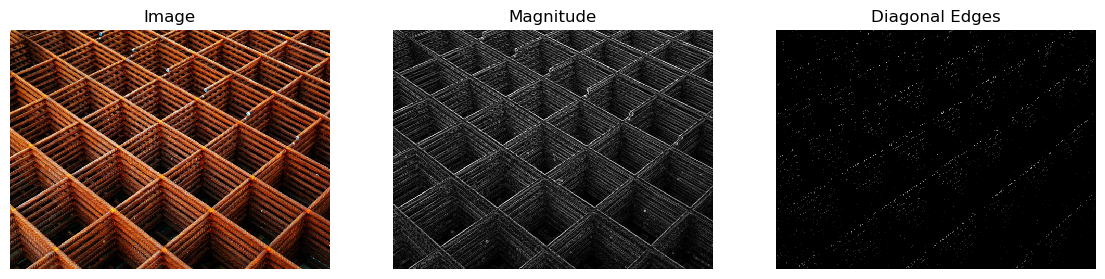

In [170]:
# Show original image and extracted edges.
display((14, 5), [
    (color, 'Image',          131),
    (mag,   'Magnitude',      132),
    (diag,  'Diagonal Edges', 133)
])

<br>

### 4 Image Denoising (10 Points)

---

In the lecture, different filters for **image denoising** have be introduced. In particular, the box filter, the Gaussian filter, and the median filter.

These filters have in common that they are *low pass* filters, meaning that they remove high frequency components from an image, which are characterized by large differences between the intensities of adjacent pixels. Since noise itself has a high frequency, it is reduced by the application of these filters.

<br>

### 4.1 Approximation (5 Points)

---

In this exercise we'll see that we can approximate a Gaussian filter by the repeated application of box filters. To this end, we'll create a synthetic image and blur the image using both filter types, comparing the results.

<br>

#### 4.1.1 Task

As a reference, filter the image created below with a Gaussian filter, using the [GaussianBlur](https://docs.opencv.org/4.6.0/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1) function of OpenCV.

For the Gaussian blur, use a standard deviation of $\sigma = 20$ and call the function with the `ksize` parameter set to `None`, so that the kernel size is computed automatically from the given $\sigma$ value.

Let $K$ be the number of iterations to apply the box filter to the image. For a good approximation of the Gaussian filter, the following relation between the filter radius $r$ of the box filter, the number of iterations $K$, and the standard deviation $\sigma$ has been suggested ([Wells](#ref-2)):

<br>

$$
    r = \Bigg\lfloor\frac{1}{2}\sqrt{\frac{12}{K}\sigma^2 + 1}\,\Bigg\rfloor
$$

<br>

Compute the size of the kernel for the box filter accordingly and use the [blur](https://docs.opencv.org/4.6.0/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37) function from OpenCV to smooth the image, for $K=1$ and $K=5$.

The result of applying the box filter 5 times should look pretty similar to the result for the Gaussian filter.

<br>

#### 4.1.2 Solution

Write your solution in the marked code cell below. Store the outputs in the given variables.

In [6]:
# Set image size.
size = 127

# Create empty image to draw on.
canvas = np.zeros((size,size), np.uint8)

# Draw white circle.
image = cv.circle(canvas, center=(size//2,size//2), radius=size//3, color=255, thickness=cv.FILLED)

In [40]:
############################################################
##                   START OF YOUR CODE                   ##
############################################################
#dimater to radius took a while in my head 
#but yeah it should be two times radius to get the diameter which is the width of kernel size
r_1 =2*int((0.5*((12*(20**2)+1))**0.5)//1)
r_2 =2*int((0.5*(((12/5)*(20**2)+1))**0.5)//1)



#apply r2 four times in beautiful code
image1=cv.blur(image, (r_2,r_2))
image2=cv.blur(image1, (r_2,r_2))
image3=cv.blur(image2, (r_2,r_2))
image4=cv.blur(image3, (r_2,r_2))



box_1 = cv.blur(image, (r_1,r_1))
#fifth time
box_5 = cv.blur(image4, (r_2,r_2))

gaussian = cv.GaussianBlur(image, None, 20)

############################################################
##                    END OF YOUR CODE                    ##
############################################################

<br>

#### 4.1.3 Result

Display your result with the following statement.

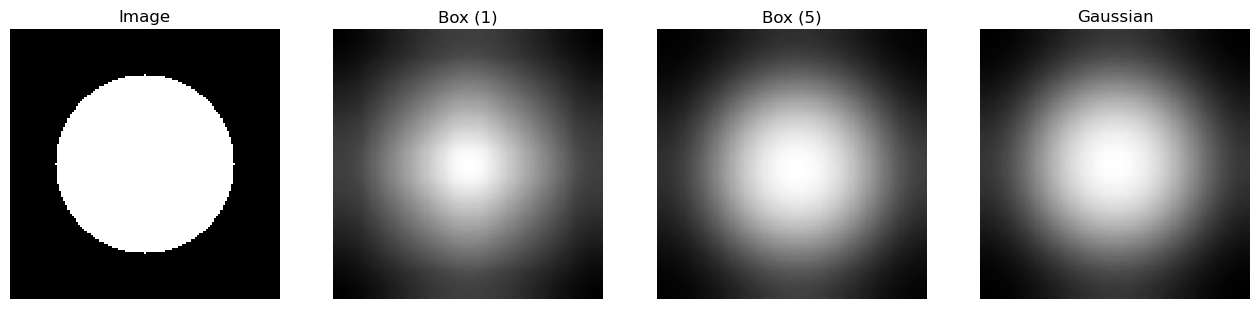

In [41]:
# Show blurred images alongside original.
display((16, 4), [
    (image,    'Image',    141),
    (box_1,    'Box (1)',  142),
    (box_5,    'Box (5)',  143),
    (gaussian, 'Gaussian', 144)
])

<br>

### 4.2 Comparsion (5 Points)

---

In this exercise we want to compare the introduced filters with respect to the **image denoising** task. In particular, we want to investigate the effects of applying the box, Gaussian, and median filters to an image corrupted with so called salt and pepper noise.

Salt and pepper noise is characterized by typically sparse distributions of erroneous pixels that are either totally white or totally black. It can be caused by bit errors during data transmission or errors during analog-digital conversion.

<br>

#### 4.2.1 Task (2 Points)

In order to make the results comparable, we'll use the *same* filter size of $5 \times 5$ for all three filters taken into consideration.

Proceed as follows:

1. Apply a box filter with the given size to the image loaded below, using the `blur` function introduced above.
2. Construct a two-dimensional Gaussian filter from two $5 \times 1$ kernels obtained from the [getGaussianKernel](https://docs.opencv.org/4.6.0/d4/d86/group__imgproc__filter.html#gac05a120c1ae92a6060dd0db190a61afa) function.
3. Apply the two-dimensional Gaussian filter to the image using the `filter2D` function.
4. Apply a median filter of the same size using the [medianBlur](https://docs.opencv.org/4.6.0/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9) function.

No loops are allowed in this exercise.

<br>

#### 4.2.2 Solution

Write your solution in the marked code cell below. Store the outputs in the given variables.

In [48]:
# Load grayscale image.
image = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE)

In [56]:
############################################################
##                   START OF YOUR CODE                   ##
############################################################

box = cv.blur(image, (5,5))
#if you apply the formular from the task before sigma should roughly be 1.5
cx=cv.getGaussianKernel(5, 1.5)
#get 2D gaussian filter
TWODG =np.outer(cx,cx)
#apply that filter
gaussian = cv.filter2D(image,-1,TWODG)

median = cv.medianBlur(image, 5)

############################################################
##                    END OF YOUR CODE                    ##
############################################################

<br>

#### 4.2.3 Result

Display your result with the following statement.

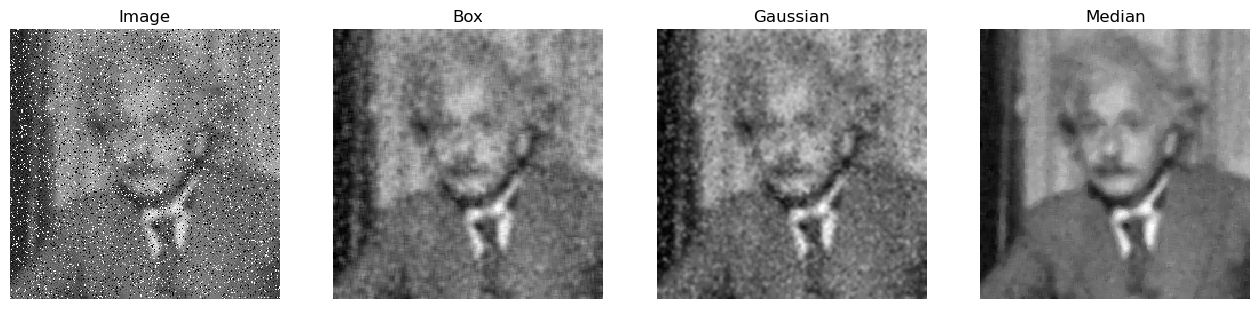

In [57]:
# Show filtered images alongside original.
display((16, 4), [
    (image,    'Image',    141),
    (box,      'Box',      142),
    (gaussian, 'Gaussian', 143),
    (median,   'Median',   144)
])

#### 4.2.4 Analysis (3 Points)

Describe your observations. Which filter worked best removing the noise from the image? Explain why this is expected given the properties of this kind of noise and the definitions of the respective filters. Be precise in your formulations and write at least four to five sentences.

##### Answer

*Write your answer here.*
<br>
The median filter does best because the noise we got here consists of extreme values (black and white) and filtering for the median ignores those extremes.
It also explains why the box filter works poorly as every filter is obatained by averaging and the extreme values have a big impact. Since the noise is distributed across the whole image there is no part of the picture where the box filter is able to perform well. The gaussian filter faces a similar problem. I think it is even worse than the box filter. As the central value in the gaussian filter has the biggest weight the output is expected to be bad whenever the kernel hits a noisy section with its center. This happens quite a lot as it seems.

<br>

### References

---

1. <span id="ref-1">V. Dumoulin and F. Visin, "A guide to convolution arithmetic for deep learning", 2016.</span>
2. <span id="ref-2">W.M. Wells, “Efficient synthesis of Gaussian filters by cascaded uniform filters”, <i>IEEE Transactions on Pattern Analysis and Machine Intelligence</i>, vol. 8, no. 2, pp. 234–239, 1986.</span>

<br>